In [14]:
%load_ext autoreload
%autoreload 2
from econml._ortho_learner import _crossfit

In [107]:
from econml.dml import LinearDMLCateEstimator
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
import numpy as np
X = np.random.normal(size=(100000, 3))
y = X[:, 0] + np.random.normal(size=(100000,))
est = LinearDMLCateEstimator(model_y=LinearRegression(), model_t=LinearRegression())
est.fit(y, X[:, 0], X[:, [1]], X[:, 2:], inference='statsmodels')

In [108]:
X[:1]

array([[ 0.04347998, -0.15620713,  0.8605264 ]])

In [109]:
est.effect_interval(X[:1, [1]])

(array([0.99336201]), array([1.00388333]))

In [110]:
est.coef_

array([9.98645400e-01, 1.45519805e-04])

In [111]:
est.coef__interval()

(array([ 0.99344973, -0.00509725]), array([1.00384107, 0.00538829]))

In [112]:
est.const_marginal_effect(X[:1, [1]])

array([0.99862267])

In [113]:
est.effect(X[:1, [1]])

array([0.99862267])

In [114]:
est.effect(X[:1, [1]], T0=5, T1=0)

array([-4.99311334])

In [34]:
X=None
X.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [13]:
import numpy as np
x = (1,np.zeros((5,2)),3)
x[1][:]=np.ones((5,2))
x

(1, array([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]), 3)

In [86]:
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
import numpy as np
from sklearn.model_selection import KFold

class Wrapper:
    def __init__(self, model):
        self._model = model
    def fit(self, X, y, W=None):
        self._model.fit(X, y)
        return self
    def predict(self, X, y, W=None):
        return self._model.predict(X), y - self._model.predict(X), X

X = np.random.normal(size=(1000, 3))
y = X[:, 0] + np.random.normal(size=(1000,))
folds = list(KFold(2).split(X, y))
model = Lasso(alpha=0.01)
nuisance, model_list= _crossfit(Wrapper(model),
                                folds,
                                X, y, W=y, Z=None)
np.testing.assert_allclose(nuisance[0][folds[0][1]], model.fit(X[folds[0][0]], y[folds[0][0]]).predict(X[folds[0][1]]))
np.testing.assert_allclose(nuisance[0][folds[0][0]], model.fit(X[folds[0][1]], y[folds[0][1]]).predict(X[folds[0][0]]))

coef_ = np.zeros(X.shape[1])
coef_[0] = 1
[np.testing.assert_allclose(coef_, mdl._model.coef_, rtol=0, atol=0.08) for mdl in model_list]

AssertionError: 
Not equal to tolerance rtol=0, atol=0.08

Mismatch: 33.3%
Max absolute difference: 0.10025215
Max relative difference: 1.
 x: array([1., 0., 0.])
 y: array([1.100252, 0.043722, 0.018593])

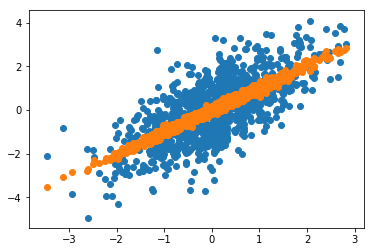

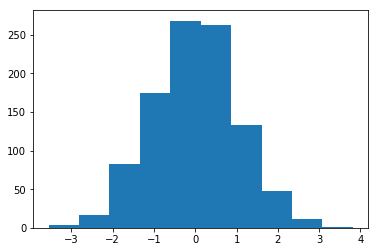

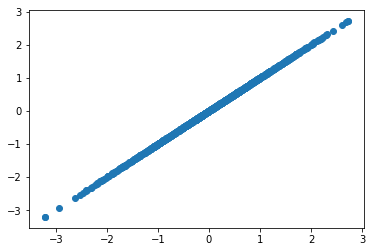

In [46]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], y)
plt.scatter(X[:, 0], nuisance[0])
plt.show()
plt.hist(nuisance[1])
plt.show()
plt.scatter(X[:, 2], nuisance[2][:, 2])
plt.show()

In [21]:
model_list[1]._model.coef_

array([ 0.95540328, -0.05546807, -0.04144514,  0.02004237, -0.01020521])